In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("D:\\datamining\\bank\\bank-full.csv",index_col=0)
df.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,,,,,,,,,,,,,,,,
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
y_mapping={'no':0,'yes':1}
job_mapping={ 'admin.':0,'blue-collar':1,'entrepreneur':2,'housemaid':3,'management':4,'retired':5,
             'self-employed':6,'services':7,'student':8,'technician':9,'unemployed':10,'unknown':11}
marital_mapping={'divorced':0,'married':1,'single':2,'unknown':3}
education_mapping={'primary':0,'secondary':1,'tertiary':2,'unknown':3}
default_mapping={'no':0,'yes':1,"unknown":2}
housing_mapping={'no':0,'yes':1,"unknown":2}
loan_mapping={'no':0,'yes':1,"unknown":2}
contact_mapping={'cellular':0,'telephone':1,"unknown":2}
month_mapping={'jan':0,'feb':1,'mar':2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11}
poutcome_mapping={ 'failure':0,'other':1,'success':2,"unknown":3}




df['y']=df['y'].map(y_mapping)
df['job']=df['job'].map(job_mapping)
df['marital']=df['marital'].map(marital_mapping)
df['education']=df['education'].map(education_mapping)
df['default']=df['default'].map(default_mapping)
df['housing']=df['housing'].map(housing_mapping)
df['loan']=df['loan'].map(loan_mapping)
df['contact']=df['contact'].map(contact_mapping)
df['month']=df['month'].map(month_mapping)
df['poutcome']=df['poutcome'].map(poutcome_mapping)
df.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,,,,,,,,,,,,,,,,
58,4,1,2,0,2143,1,0,2,5,4,261,1,-1,0,3,0
44,9,2,1,0,29,1,0,2,5,4,151,1,-1,0,3,0
33,2,1,1,0,2,1,1,2,5,4,76,1,-1,0,3,0
47,1,1,3,0,1506,1,0,2,5,4,92,1,-1,0,3,0
33,11,2,3,0,1,0,0,2,5,4,198,1,-1,0,3,0


In [4]:
print(df['y'].unique())
print(df['job'].unique())
print(df['marital'].unique())
print(df['education'].unique())
print(df['default'].unique())
print(df['housing'].unique())
print(df['loan'].unique())
print(df['contact'].unique())
print(df['month'].unique())
print(df['poutcome'].unique())

[0 1]
[ 4  9  2  1 11  5  0  7  6 10  3  8]
[1 2 0]
[2 1 3 0]
[0 1]
[1 0]
[0 1]
[2 0 1]
[ 4  5  6  7  9 10 11  0  1  2  3  8]
[3 0 1 2]


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('y',axis=1))
scaled_features = scaler.transform(df.drop('y',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,-0.475354,0.011016,-0.569351,-0.411453,-0.25194,0.444898
1,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,-0.475354,-0.416127,-0.569351,-0.411453,-0.25194,0.444898
2,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,-0.475354,-0.707361,-0.569351,-0.411453,-0.25194,0.444898
3,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,-0.475354,-0.645231,-0.569351,-0.411453,-0.25194,0.444898
4,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,-0.475354,-0.233620,-0.569351,-0.411453,-0.25194,0.444898


In [6]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

X = df_feat
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [7]:
#使用KNN演算法
from sklearn.neighbors import KNeighborsClassifier

#從k=1開始測試
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [8]:
#測試KNN演算法的好壞
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[7464  480]
 [ 640  459]]


In [9]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7944
           1       0.49      0.42      0.45      1099

    accuracy                           0.88      9043
   macro avg       0.70      0.68      0.69      9043
weighted avg       0.87      0.88      0.87      9043



In [10]:
knnModel = KNeighborsClassifier(n_neighbors=3)#最近3點
knnModel.fit(X_train,y_train)
predicted = knnModel.predict(X_train)
print('訓練集: ',knnModel.score(X_train,y_train))
print('測試集: ',knnModel.score(X_test,y_test))

訓練集:  0.9350254368502544
測試集:  0.8928452947030853


In [11]:
knnModel = KNeighborsClassifier(n_neighbors=4)#最近4點
knnModel.fit(X_train,y_train)
predicted = knnModel.predict(X_train)
print('訓練集: ',knnModel.score(X_train,y_train))
print('測試集: ',knnModel.score(X_test,y_test))

訓練集:  0.9204821942048219
測試集:  0.8933982085591065


In [12]:
knnModel = KNeighborsClassifier(n_neighbors=5)#最近5點
knnModel.fit(X_train,y_train)
predicted = knnModel.predict(X_train)
print('訓練集: ',knnModel.score(X_train,y_train))
print('測試集: ',knnModel.score(X_test,y_test))

訓練集:  0.922417606724176
測試集:  0.8950569501271702


In [13]:
knnModel = KNeighborsClassifier(n_neighbors=6)#最近6點
knnModel.fit(X_train,y_train)
predicted = knnModel.predict(X_train)
print('訓練集: ',knnModel.score(X_train,y_train))
print('測試集: ',knnModel.score(X_test,y_test))

訓練集:  0.9139847378898474
測試集:  0.8968262744664381


In [14]:
#剛剛只先用了k=1來建立模型，現在利用for loop來建立迴圈，選擇k值
error_rate = []

for i in range(1,60):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

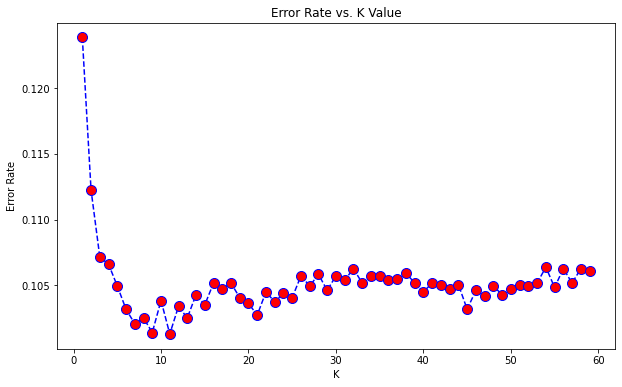

In [15]:
#將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5-6%之間震盪。
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [16]:
#跟一開始k=1做比較
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH k=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
#要看 accuracy &f1-score 0.88(訓練)

WITH k=1


[[7464  480]
 [ 640  459]]


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7944
           1       0.49      0.42      0.45      1099

    accuracy                           0.88      9043
   macro avg       0.70      0.68      0.69      9043
weighted avg       0.87      0.88      0.87      9043



In [17]:
#擇錯誤率最低的K=40來看precision、recall、f1-score、support表現
knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH k=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
#要看 accuracy &f1-score 0.90 (預測出來的)

WITH k=1


[[7838  106]
 [ 839  260]]


              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7944
           1       0.71      0.24      0.35      1099

    accuracy                           0.90      9043
   macro avg       0.81      0.61      0.65      9043
weighted avg       0.88      0.90      0.87      9043



In [18]:
#https://reurl.cc/YjkaWO

In [19]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,pred)
print("MAE: ",mae)

MAE:  0.10450071878801283


In [20]:
import math
MSE = np.square(np.subtract(y_test,pred)).mean() 
RMSE = math.sqrt(MSE)
print("RMSE: ",RMSE)

RMSE:  0.32326570926717985


In [21]:
mape = mean_absolute_error(y_test,pred)*100
print("MAPE: ",mape)

MAPE:  10.450071878801284
